In [131]:
import pandas as pd
import datetime
import seaborn as sns
%matplotlib inline

In [109]:
df_obs = pd.read_csv("DWE_THALIA_2014:H:[None to 2016-11-20][2016-11-21 to 2016-12-21]_observed.csv",sep=';',parse_dates=['date_time'])

In [110]:
df_pred = pd.read_csv("DWE_THALIA_2014_predictions_H_compensatedin.csv",sep=';',parse_dates=['date_time'])

In [111]:
df = (pd.merge(df_obs[['date_time','compensatedin','idbldsite']],
               df_pred[['date_time','idbldsite','compensatedin','compensatedin_xgboost']],suffixes=['_obs','_pred'],
              on=['idbldsite','date_time']))
      

In [112]:
df['hour'] = df.date_time.dt.hour

In [151]:
df2 = df.set_index('date_time')
df2=df2[(df2.hour>10)& (df2.hour<17)]
df2 = df2[df2.index.dayofweek==4]
# df2 = df2[(df2.index>datetime.datetime(2016,11,22))& (df2.index<=datetime.datetime(2016,11,23))]
df2.head(24)

,compensatedin_obs,idbldsite,compensatedin_pred,compensatedin_xgboost,hour
date_time,,,,,
2016-11-25 11:00:00,281,1,275.846667,278.052399,11
2016-11-25 12:00:00,335,1,306.170000,318.675232,12
2016-11-25 13:00:00,387,1,334.926667,331.007355,13
2016-11-25 14:00:00,358,1,343.183333,331.007355,14
2016-11-25 15:00:00,378,1,341.340000,327.194763,15
2016-11-25 16:00:00,432,1,350.070000,327.194763,16


In [137]:
df2.idbldsite.unique()

array([1])

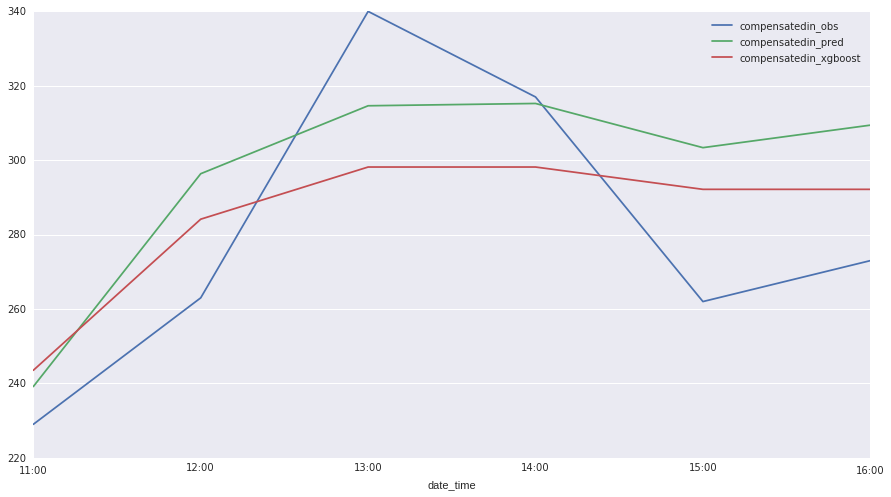

In [150]:
df2[['compensatedin_obs','compensatedin_pred','compensatedin_xgboost']].plot(figsize=(15,8))